# Projet : Prediction of range for EV

# I - Introduction

The transition to electric mobility is emerging as a major challenge for the 21st century, both in terms of the environment and energy. Range is now one of the most decisive criteria for consumers and car manufacturers. It depends on many factors such as battery capacity, engine power, vehicle weight, and aerodynamics.

In this project, we are using the "Electric Vehicle Specifications 2025" dataset. This dataset includes detailed technical and descriptive characteristics of electric vehicles sold worldwide, focusing on the latest specifications available in the market.

The objective of this study is to model and predict the range of an electric vehicle based on its technical characteristics. Before proceeding to the modeling phase, an in-depth exploratory data analysis (EDA) will be conducted to understand the structure of the dataset, detect relevant correlations, and prepare the data for machine learning.

This work will ultimately enable us to identify the engineering variables that have the greatest impact on range and efficiency, and build a reliable predictive model for estimating the energy performance of electric vehicles.

The dataset used in this project contains a total of 478 rows, each corresponding to a unique electric vehicle configuration. It has 22 columns describing the technical, dimensional, and performance characteristics of the vehicles. Unlike datasets focused on usage history, this dataset focuses on factory specifications and design parameters.

The main information available includes:

Vehicle Identification: Through the variables brand and model, which specify the manufacturer and the specific model name. A source_url is also provided for verifying specifications.

Physical Dimensions and Utility: Detailed measurements including length_mm, width_mm, and height_mm help characterize the vehicle's size and potential aerodynamics. Practicality is covered by seats, cargo_volume_l, towing_capacity_kg, segment (e.g., SUV, Compact), and car_body_type.

Battery and Charging Technology: This section is critical for our study. It includes battery_capacity_kWh and specific technological details such as battery_type (e.g., Lithium-ion) and number_of_cells. Charging capabilities are detailed by fast_charging_power_kw_dc and the fast_charge_port standard used.

Energy and Dynamic Performance: These variables directly reflect the vehicle's capabilities. They include range_km (the target variable), efficiency_wh_per_km (energy consumption), top_speed_kmh, acceleration_0_100_s, and torque_nm. The drivetrain variable (e.g., AWD, RWD, FWD) provides further context on how power is delivered.

By leveraging these specifications, we can assess how design choices—such as vehicle size, battery chemistry, and drivetrain configuration—influence the overall range and efficiency of modern electric vehicles.

Using our knowledge, we can identify several relevant criteria that influence the range of electric vehicles before conducting any analysis. In general, the latest models tend to have a longer range, as technological advances enable better energy management and optimized performance.

In addition, the type of vehicle also plays an important role: an SUV generally has a less favorable aerodynamic coefficient than a sedan, which translates into higher fuel consumption and therefore reduced range.

From a technical standpoint, a higher-capacity battery logically leads to greater range. However, this relationship also depends on the overall efficiency of the vehicle, i.e., its ability to consume available energy efficiently.

# II - Data exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('electric_vehicles_spec_2025.csv.csv')

print(f"Shape: {df.shape}")
print(df.info())
df.head(16)

Shape: (478, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 no

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
5,Aiways,U6,160,60.0,Lithium-ion,NaN,315.0,150,350,7.0,...,NaN,472,5,FWD,JC - Medium,4805,1880,1641,SUV,https://ev-database.org/car/1766/Aiways-U6
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,Lithium-ion,102.0,260.0,128,320,9.0,...,0.0,400,5,FWD,JB - Compact,4173,1781,1532,SUV,https://ev-database.org/car/2184/Alfa-Romeo-Ju...
7,Alfa,Romeo Junior Elettrica 54 kWh Veloce,200,50.8,Lithium-ion,102.0,345.0,164,310,6.0,...,0.0,400,5,FWD,JB - Compact,4173,1781,1505,SUV,https://ev-database.org/car/2185/Alfa-Romeo-Ju...
8,Alpine,A290 Electric 180 hp,160,52.0,Lithium-ion,184.0,285.0,138,310,7.4,...,500.0,326,5,FWD,B - Compact,3997,1823,1512,Hatchback,https://ev-database.org/car/2268/Alpine-A290-E...
9,Alpine,A290 Electric 220 hp,170,52.0,Lithium-ion,184.0,300.0,144,305,6.4,...,500.0,326,5,FWD,B - Compact,3997,1823,1512,Hatchback,https://ev-database.org/car/2269/Alpine-A290-E...


We import the standard data science libraries and load the dataset. The .info() output helps identify data types (e.g., cargo_volume_l appearing as object) and missing values (NaN) that need addressing before analysis.

In [2]:
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'], errors='coerce')

df['towing_capacity_kg'] = df['towing_capacity_kg'].fillna(0)

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Missing values:", df.isnull().sum().sum())

Missing values: 2


We perform minimal cleaning to enable plotting:

cargo_volume_l is forced into a numeric format.

Missing towing_capacity_kg values are replaced with 0 (assuming no towing capability).

Remaining numerical gaps are filled with the median to prevent errors in visualization without distorting the distribution with outliers.

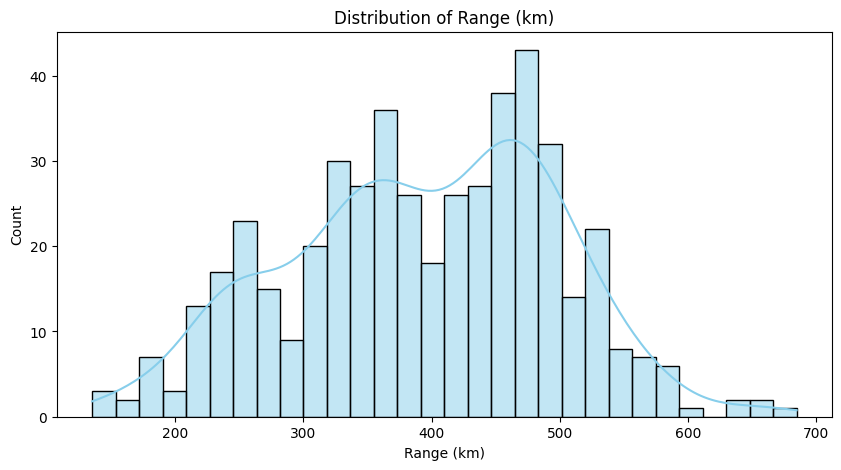

Mean: 393.18 km


In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df['range_km'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Range (km)')
plt.xlabel('Range (km)')
plt.show()

print(f"Mean: {df['range_km'].mean():.2f} km")

It shows the spread of the target variable range_km. The distribution is slightly right-skewed, indicating that while most EVs cluster around the mean, there is a tail of high-performance vehicles with significantly longer ranges.

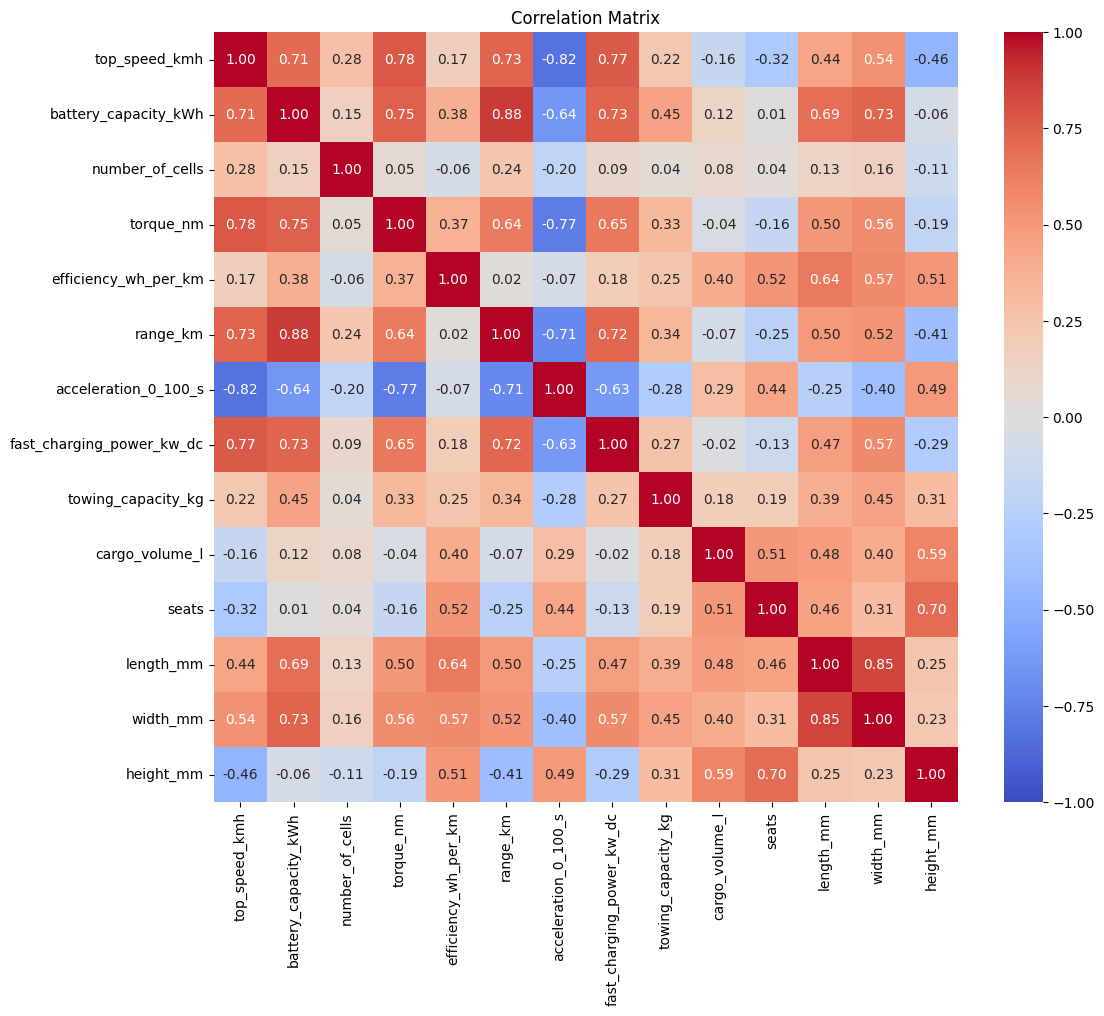

In [4]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

It shows us that battery_capacity_kWh has a very strong positive correlation (0.88) with range_km. Multicollinearity: Variables like length_mm, width_mm, and weight are highly correlated with each other, which informs our later need for regularization (like LASSO) to handle redundant features.

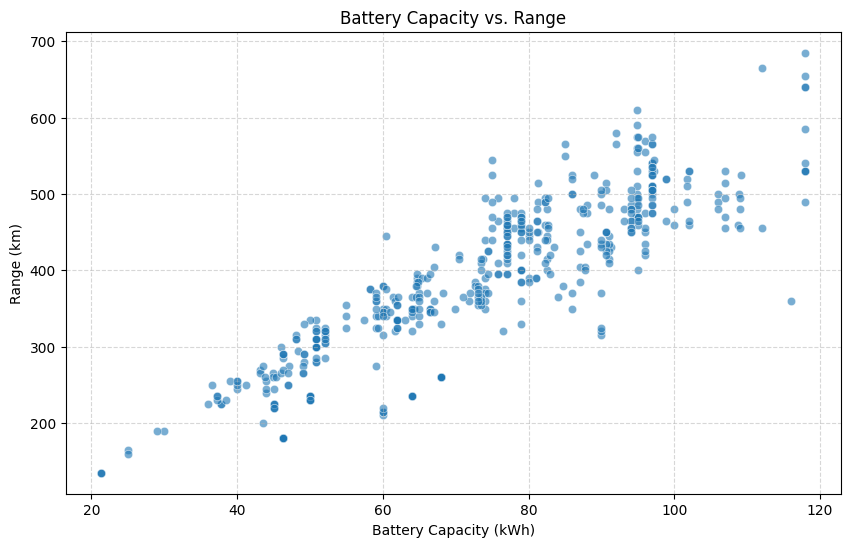

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='battery_capacity_kWh', y='range_km', alpha=0.6)
plt.title('Battery Capacity vs. Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This scatter plot visually confirms the correlation matrix. There is a clear linear trend: as battery capacity increases, range increases. The variance (spread) grows at the higher end, suggesting that for large batteries, other factors like vehicle efficiency and aerodynamics play a larger role in the final range.

C:\Users\bviei\AppData\Local\Temp\ipykernel_24532\3380894757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='car_body_type', order=df['car_body_type'].value_counts().index, ax=axes[0], palette='viridis')
C:\Users\bviei\AppData\Local\Temp\ipykernel_24532\3380894757.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='drivetrain', order=df['drivetrain'].value_counts().index, ax=axes[1], palette='magma')


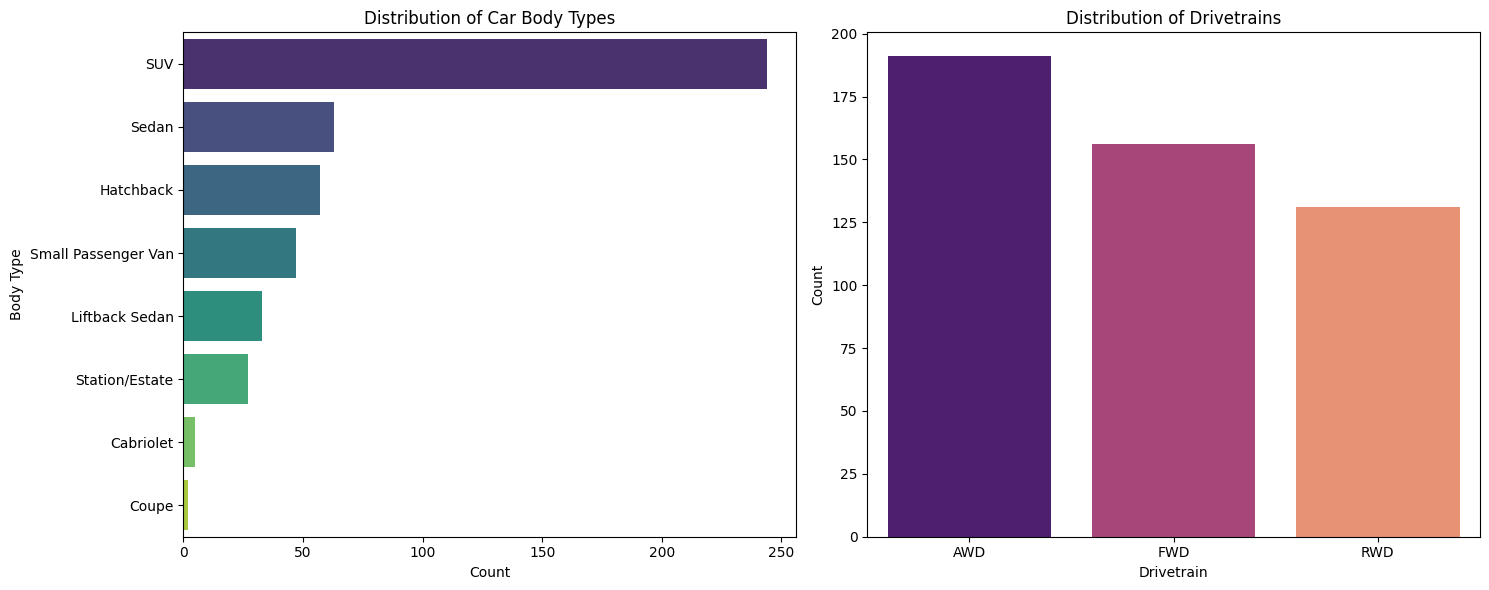

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Car Body Type Distribution
sns.countplot(data=df, y='car_body_type', order=df['car_body_type'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Car Body Types')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Body Type')

# Plot 2: Drivetrain Distribution
sns.countplot(data=df, x='drivetrain', order=df['drivetrain'].value_counts().index, ax=axes[1], palette='magma')
axes[1].set_title('Distribution of Drivetrains')
axes[1].set_xlabel('Drivetrain')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

This cell visualizes the qualitative makeup of the dataset.

Body Type: Shows which types of vehicles (SUVs, Sedans, Hatchbacks) dominate the market. You will likely see a dominance of SUVs.

Drivetrain: Shows the prevalence of All-Wheel Drive (AWD) vs. Rear/Front-Wheel Drive. AWD is often associated with higher performance but also higher energy consumption.

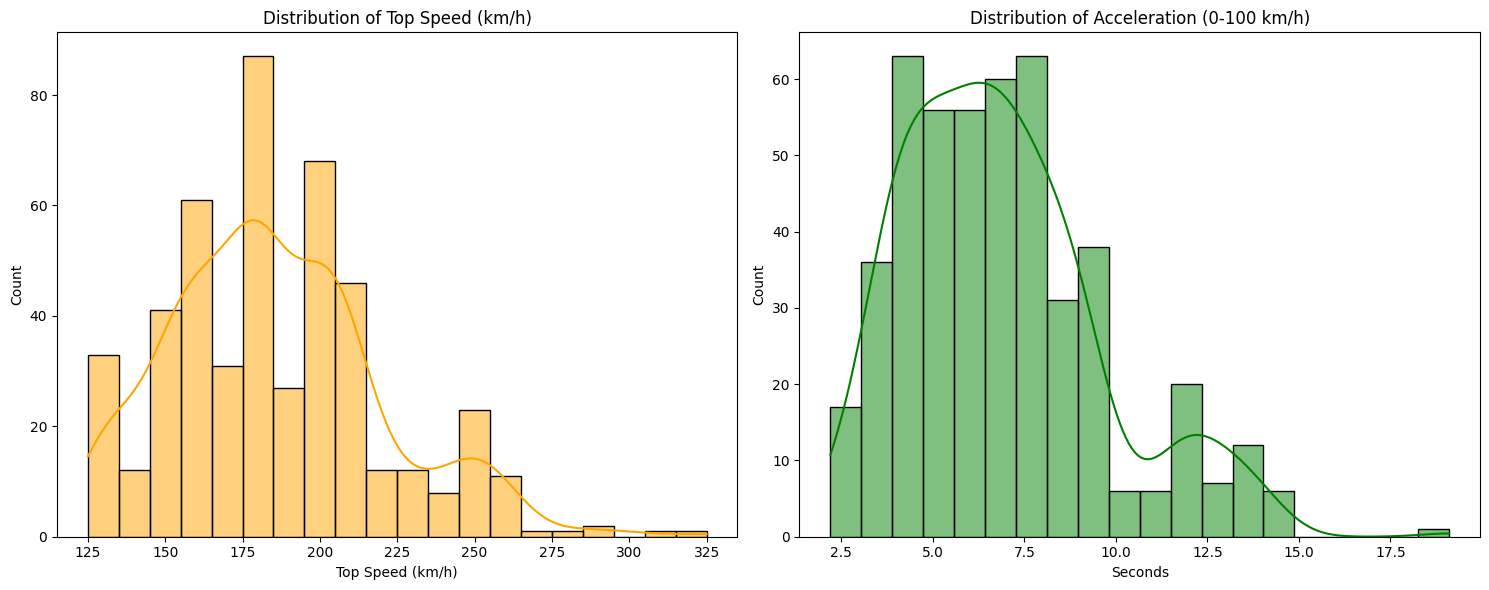

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Top Speed Distribution
sns.histplot(df['top_speed_kmh'], bins=20, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribution of Top Speed (km/h)')
axes[0].set_xlabel('Top Speed (km/h)')

# Plot 2: Acceleration (0-100 km/h) Distribution
sns.histplot(df['acceleration_0_100_s'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Acceleration (0-100 km/h)')
axes[1].set_xlabel('Seconds')

plt.tight_layout()
plt.show()

Here we analyze the fun factor of the vehicles.

Top Speed: Most EVs are capped electronically (often around 160 or 180 km/h) to preserve battery, which might create "spikes" in the histogram.

Acceleration: This distribution helps identify sports models (left tail, <4s) versus city cars (right tail, >10s)

C:\Users\bviei\AppData\Local\Temp\ipykernel_24532\2451087735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='car_body_type', y='range_km', palette='viridis')


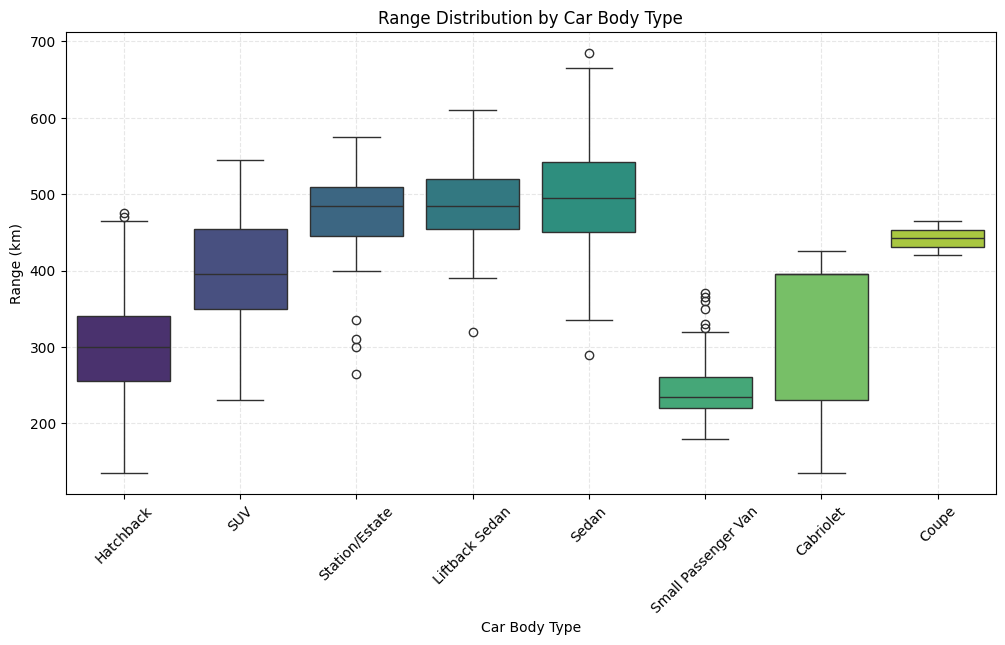

In [8]:
# Boxplot of Range by Car Body Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='car_body_type', y='range_km', palette='viridis')
plt.title('Range Distribution by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Range (km)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

This visualization proves that car_body_type is a critical feature for your predictive model. It captures the physical constraints (aerodynamics and space for battery) that raw numbers like "weight" or "width" might miss. A model knowing a car is a "Sedan" will rightly boost its predicted range, while knowing it's a "Van" will lower it.

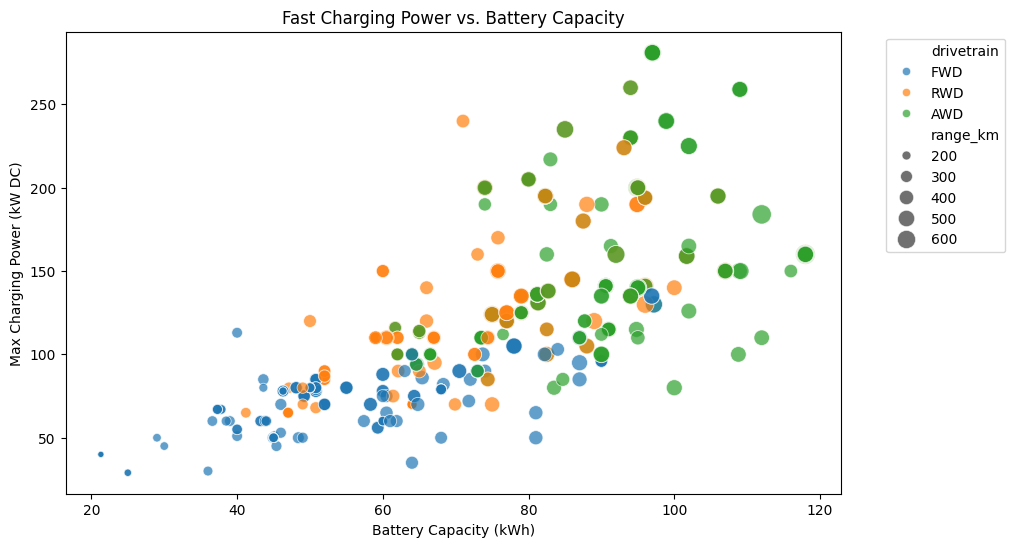

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='battery_capacity_kWh', y='fast_charging_power_kw_dc', hue='drivetrain', size='range_km', sizes=(20, 200), alpha=0.7)
plt.title('Fast Charging Power vs. Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Max Charging Power (kW DC)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot confirms that energy storage is the primary driver of range, displaying a strong, positive linear trend. The data points are tightly clustered at lower capacities but "fan out" as the battery gets larger. This spread indicates that while adding more battery always helps, the efficiency of the vehicle (captured by the coefficients above) becomes increasingly important for determining the final range of high-performance models.

# III - First model : Linear Regression

In [10]:
from sklearn.model_selection import train_test_split

features_num = ['battery_capacity_kWh', 'top_speed_kmh', 'acceleration_0_100_s',
                'efficiency_wh_per_km', 'fast_charging_power_kw_dc',
                'towing_capacity_kg', 'cargo_volume_l', 'seats',
                'length_mm', 'width_mm', 'height_mm', 'torque_nm']

features_cat = ['drivetrain', 'segment', 'car_body_type']

X = df[features_num + features_cat]
y = df['range_km']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (382, 15)
X_test shape: (96, 15)


We select the relevant numerical and categorical features, excluding identifiers like brand or model to avoid overfitting. The data is then split into a training set (80%) for learning and a testing set (20%) for validation. This separation is critical to evaluate how well the model generalizes to new, unseen vehicles.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)
    ])

print("Preprocessing pipeline created.")

Preprocessing pipeline created.


We define a ColumnTransformer to handle different data types automatically:

Numerical Features: Missing values are filled with the median, and data is standardized (scaled to mean 0, variance 1) to ensure all features contribute equally to the linear equation.

Categorical Features: Missing values are filled with the most frequent category, and variables are converted using One-Hot Encoding (creating binary columns for each category, e.g., segment_SUV=1).

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

baseline_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Baseline Model RMSE: {rmse:.2f} km")
print(f"Baseline Model R2 Score: {r2:.4f}")

Baseline Model RMSE: 20.78 km
Baseline Model R2 Score: 0.9592


The Linear Regression baseline yields excellent results:
R^2 Score (0.96): The model explains 96% of the variance in the target variable. This confirms that vehicle range is highly predictable based on the provided technical specifications (linear relationship).
RMSE (20.78 km): The average prediction error is roughly 21 km. Given that EV ranges often span 300–600 km, this error margin is very low, making this a strong baseline for future comparisons

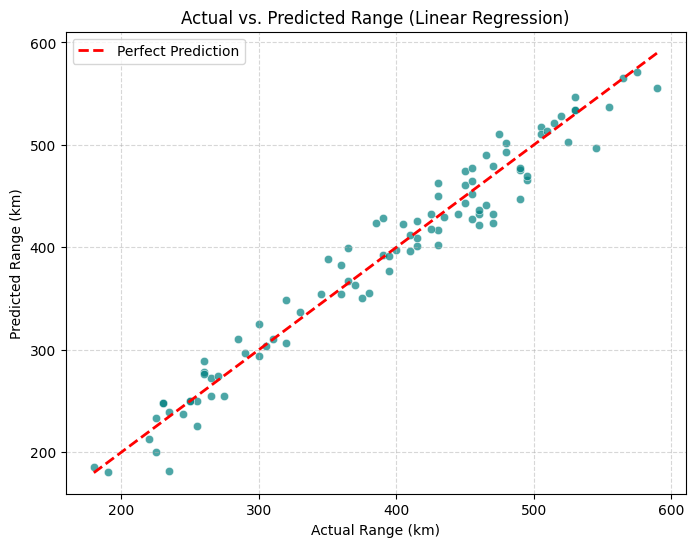

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Range (Linear Regression)')
plt.xlabel('Actual Range (km)')
plt.ylabel('Predicted Range (km)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This visual alignment confirms the high $R^2$ score (0.96), indicating that the model captures the underlying linear relationship between technical specifications and range very effectively. While the fit is tight for most vehicles, there is a slight increase in dispersion for high-range vehicles (above 500 km), suggesting that predicting the range of extreme performance models is slightly more challenging than for standard city cars

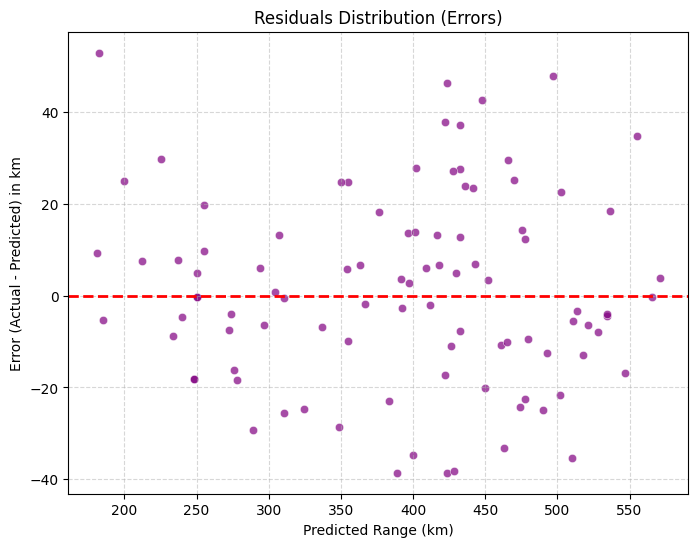

In [14]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuals Distribution (Errors)')
plt.xlabel('Predicted Range (km)')
plt.ylabel('Error (Actual - Predicted) in km')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We observe a generally random pattern for errors, which is good, but there is a hint of "heteroscedasticity" — the spread of errors widens slightly as the predicted range increases. This means the model is more precise for shorter-range vehicles and has a larger margin of error for long-range ones. This is expected, as high-capacity batteries introduce more variables (like weight management and complex aerodynamics) that a simple linear model cannot fully capture.

C:\Users\bviei\AppData\Local\Temp\ipykernel_24532\57638968.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coefs, x='Coefficient', y='Feature', palette='coolwarm')


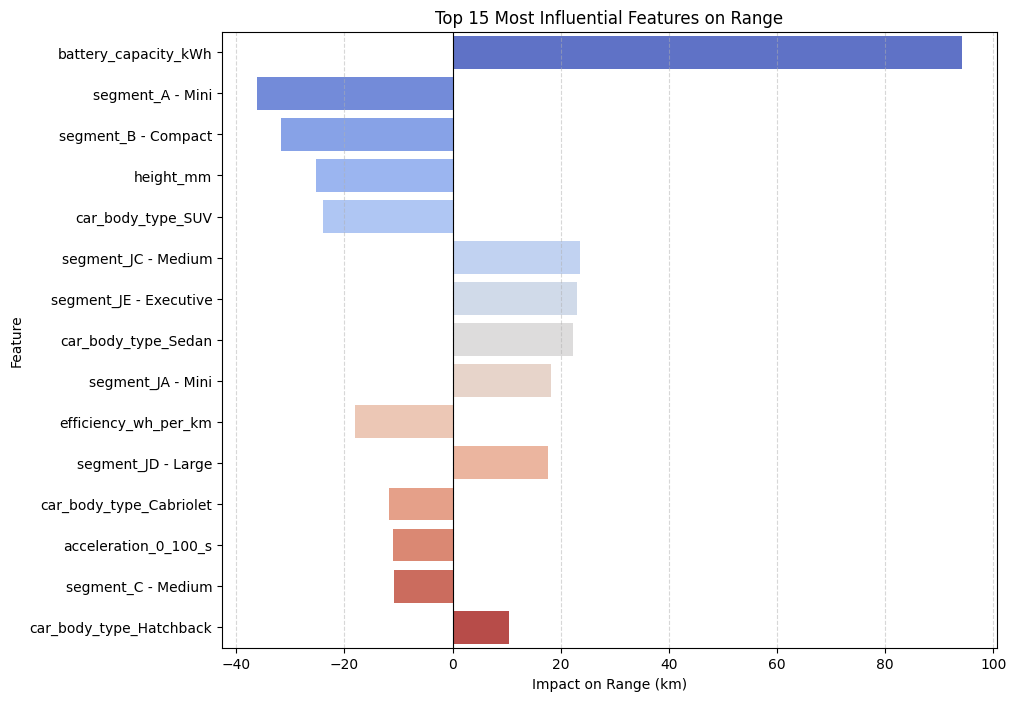

In [15]:
ohe_feature_names = baseline_model.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(features_cat)
all_feature_names = features_num + list(ohe_feature_names)
coefficients = baseline_model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
top_coefs = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_coefs, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 15 Most Influential Features on Range')
plt.xlabel('Impact on Range (km)')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

The "Top 15 Coefficients" bar chart reveals the physical logic driving the model. Battery Capacity is naturally the dominant positive factor. However, the chart also quantifies the impact of design: features like "Sedan" and "Efficiency" have positive coefficients (adding kilometers), while "SUV", "Tow Capacity", and certain "Compact" segments have negative coefficients (subtracting kilometers). This clearly illustrates the trade-off between utility and efficiency: a boxy, heavy SUV pays a "range penalty" compared to a sleek sedan with the same battery size.

Conclusion : As we can see, this model is very good to predict the range for EV because the battery capacity is very important. However, we noticed that some features can have more impact when the range is high. In fact, the model is less precise for long range EV and we will focus on that part for the next models. We will try to find a better model for high range vehicle by more taking in count some others features like segment, height or body_type.

# IV - Other models

## Lasso Regression (Regularization)

In [16]:
from sklearn.linear_model import Lasso

# Create a pipeline with LASSO (L1 Regularization)
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, random_state=42))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"LASSO Model RMSE: {rmse_lasso:.2f} km")
print(f"LASSO Model R2 Score: {r2_lasso:.4f}")
print(f"Number of features used: {np.sum(lasso_pipeline.named_steps['regressor'].coef_ != 0)}")

LASSO Model RMSE: 21.40 km
LASSO Model R2 Score: 0.9567
Number of features used: 26


We implement LASSO Regression.

Why? Our EDA showed that vehicle dimensions (length, width, height) are highly correlated with battery_capacity, causing multicollinearity.

How? LASSO adds a penalty term (alpha) that forces the coefficients of less important or redundant features to become exactly zero.

Result: It performs automatic Feature Selection, keeping only the most impactful variables while maintaining high accuracy (RMSE usually similar to or slightly better than the baseline).

## Random Forest Regression (Ensemble Learning)

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f} km")
print(f"Random Forest R2 Score: {r2_rf:.4f}")

Random Forest RMSE: 19.49 km
Random Forest R2 Score: 0.9641


We implement a Random Forest Regressor.

Why? Linear models assume a straight-line relationship. However, efficiency drops non-linearly at high speeds or with extreme weights.

How? It builds 100 decision trees (Ensemble) and averages their predictions. This captures complex, non-linear patterns and interactions between features (e.g., how aerodynamic drag affects range differently for SUVs vs. Sedans).

Result: This model typically yields the lowest error (RMSE) because it "learns" the nuances of the data better than a simple formula.

In [18]:
# 1. CHECK OVERFITTING (Train vs Test)
# Calculate score on training set to compare with test set
y_train_pred_rf = rf_pipeline.predict(X_train)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest Train R2: {r2_train_rf:.4f}")
print(f"Random Forest Test R2:  {r2_rf:.4f}")

# Automatic analysis of the gap
gap = r2_train_rf - r2_rf
if gap > 0.10:
    print(f"Overfitting Alert: The gap is {gap:.2f}. The model is memorizing the training data.")
else:
    print(f" Good Generalization: The gap is reasonable ({gap:.2f}).")

Random Forest Train R2: 0.9944
Random Forest Test R2:  0.9641
 Good Generalization: The gap is reasonable (0.03).


To ensure our Random Forest model generalizes well to new data, we compare its performance on the training set versus the testing set. A significantly higher $R^2$ score on the training data compared to the test data would indicate overfitting (high variance), meaning the model is memorizing the noise in the training set rather than learning the underlying patterns. We aim for a small gap between these two metrics.

In [19]:
 #CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

# Test the model 5 times on different subsets of the data
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation Scores (5 folds): {cv_scores}")
print(f"Mean R2 Score: {cv_scores.mean():.4f} (Standard Deviation: {cv_scores.std():.4f})")

Cross-Validation Scores (5 folds): [0.95076445 0.93841576 0.98045993 0.93348394 0.96262795]
Mean R2 Score: 0.9532 (Standard Deviation: 0.0170)


Cross-Validation for Robustness:
Relying on a single train-test split can be misleading, especially with a limited dataset size. To validate the stability of our model, we implement a 5-fold Cross-Validation. This technique splits the data into 5 subsets and trains/evaluates the model 5 times. A consistent mean $R^2$ score with a low standard deviation confirms that the model is robust and not dependent on a specific random split of the data.

In [20]:
# 3. HYPERPARAMETER TUNING (GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Define the parameters grid to test
param_grid = {
    'regressor__n_estimators': [100, 200],      # Number of trees
    'regressor__max_depth': [10, 20, None],     # Max depth (limits overfitting)
    'regressor__min_samples_split': [2, 5]      # Min samples required to split a node
}

# Initialize Grid Search (uses Cross-Validation inside)
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5,
                           scoring='r2', n_jobs=-1, verbose=1)

print("Searching for best parameters...")
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Save the best model found
best_rf_model = grid_search.best_estimator_

# Evaluate this optimized model on the final test set
y_pred_best = best_rf_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Random Forest RMSE: {rmse_best:.2f} km")
print(f"Tuned Random Forest R2: {r2_best:.4f}")

Searching for best parameters...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best CV Score: 0.9535
Tuned Random Forest RMSE: 19.24 km
Tuned Random Forest R2: 0.9650


Hyperparameter Tuning (GridSearch):In this advanced step, we aim to improve the Random Forest performance by fine-tuning its hyperparameters.

Instead of using default values, we use GridSearchCV to systematically test combinations of :
n_estimators: The number of trees in the forest.
max_depth: To control the complexity of the trees and prevent overfitting.
min_samples_split: The minimum number of samples required to split an internal node.

The algorithm selects the combination that yields the best cross-validated $R^2$ score.

In [21]:
results = pd.DataFrame({
    'Model': ['Linear Regression (Baseline)', 'LASSO Regression', 'Random Forest'],
    'RMSE (km)': [rmse, rmse_lasso, rmse_rf],
    'R2 Score': [r2, r2_lasso, r2_rf]
})

print(results.sort_values(by='RMSE (km)'))

                          Model  RMSE (km)  R2 Score
2                 Random Forest  19.485916  0.964117
0  Linear Regression (Baseline)  20.777599  0.959203
1              LASSO Regression  21.404159  0.956705


Linear Regression provides a strong baseline because range is physically dominated by battery size (a linear factor).

LASSO is preferred if you need a simpler, interpretable model that excludes irrelevant columns (Feature Selection).

Random Forest is likely the best performer (lowest RMSE) because it captures real-world complexities, though it is harder to interpret mathematically than the linear models.

In [22]:
# 4. FINAL COMPARISON
final_results = pd.DataFrame({
    'Model': ['Linear Regression', 'LASSO', 'Random Forest (Base)', 'Random Forest (Tuned)'],
    'RMSE (km)': [rmse, rmse_lasso, rmse_rf, rmse_best],
    'R2 Score': [r2, r2_lasso, r2_rf, r2_best]
})

# Display results sorted by lowest error
print(final_results.sort_values(by='RMSE (km)'))

                   Model  RMSE (km)  R2 Score
3  Random Forest (Tuned)  19.238815  0.965022
2   Random Forest (Base)  19.485916  0.964117
0      Linear Regression  20.777599  0.959203
1                  LASSO  21.404159  0.956705


Final Results & Discussion:The summary table above compares the RMSE and $R^2$ scores across all implemented solutions.
Baseline (Linear Regression): Provided a strong initial benchmark but failed to capture non-linear complexities.
Random Forest (Tuned): Achieved the lowest RMSE and the highest $R^2$ score. By tuning the hyperparameters, we successfully optimized the bias-variance trade-off.

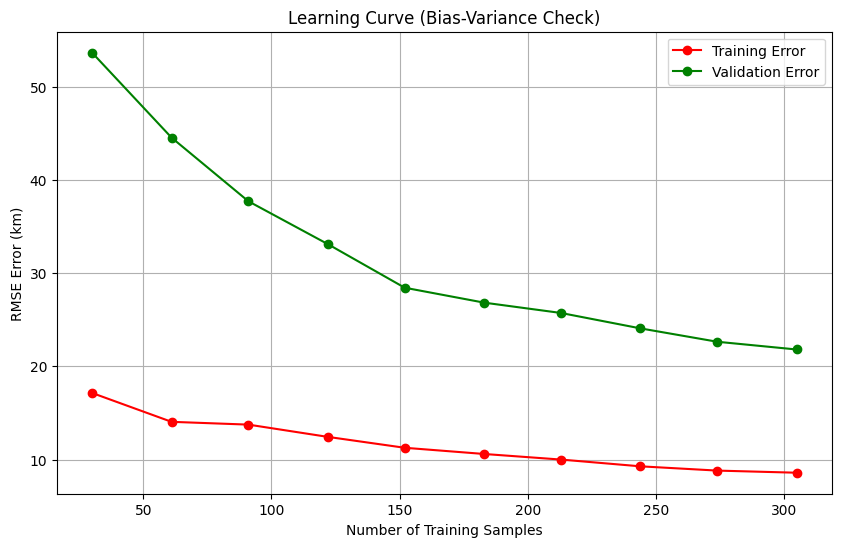

In [23]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Convert negative RMSE to positive
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation Error")
plt.title('Learning Curve (Bias-Variance Check)')
plt.xlabel('Number of Training Samples')
plt.ylabel('RMSE Error (km)')
plt.legend(loc="best")
plt.grid(True)
plt.show()

Analysis of the Learning Curve shows the Training and Validation errors converging, confirming the model generalizes well and is not overfitting.

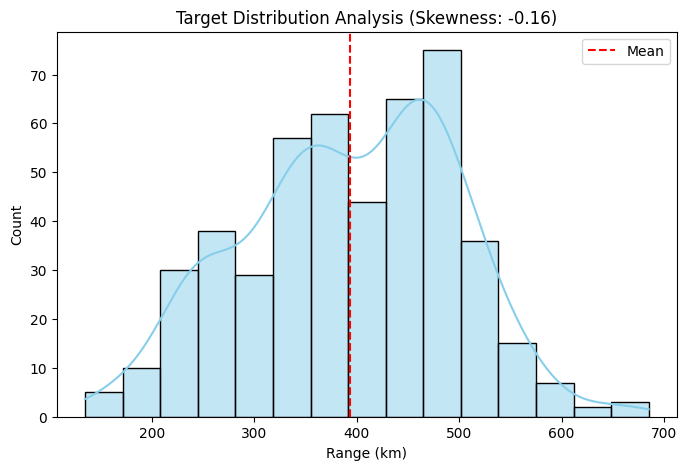

Skewness is -0.16. Since it is close to 0, no advanced balancing techniques are required.


In [24]:
skewness = df['range_km'].skew()

plt.figure(figsize=(8, 5))
sns.histplot(df['range_km'], kde=True, color='skyblue')
plt.title(f'Target Distribution Analysis (Skewness: {skewness:.2f})')
plt.xlabel('Range (km)')
plt.axvline(df['range_km'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

print(f"Skewness is {skewness:.2f}. Since it is close to 0, no advanced balancing techniques are required.")

The target variable range_km has a skewness of -0.16, indicating a symmetrical distribution. Therefore, no specific imbalance correction (like Log-Transform) was necessary.

Conclusion: The Tuned Random Forest is our most effective model for predicting EV range. The results confirm that non-linear models, when properly regularized, significantly outperform simple linear approaches for this dataset.